In [1]:
%reload_ext autoreload
%autoreload 2
%matplotlib inline

In [2]:
import math
import time
import os
import glob
import numpy as np
import matplotlib.pyplot as plt 
from tqdm import tqdm
from PIL import Image
from sklearn.metrics import confusion_matrix

In [3]:
import torch
import torch.nn as nn
import torch.optim as optim
from torch.autograd import Variable

import torchvision
import torchvision.datasets as datasets
import torchvision.models as models
import torchvision.transforms as transforms

In [4]:
#import train
from train import train_model
from model_utils import *
from predict_utils import *
from vis_utils import *

In [7]:
np.set_printoptions(precision=2)
use_gpu= torch.cuda.is_available()
np.random.seed(1234)

In [8]:
data_dir= "D:\\Ali\\python files\\catvsdog\\dev\\"
sz= 224
batch_size= 16

In [9]:
data_dir

'D:\\Ali\\python files\\catvsdog\\dev\\'

In [10]:
os.listdir(data_dir)

['train', 'valid']

In [11]:
trn_dir= f'{data_dir}train'
val_dir= f'{data_dir}valid'

In [12]:
trn_dir

'D:\\Ali\\python files\\catvsdog\\dev\\train'

In [13]:
os.listdir(trn_dir)

['cat', 'dog']

In [14]:
os.listdir(val_dir)

['cat', 'dog']

In [15]:
trn_fnames= glob.glob(f'{val_dir}/*/*.jpg')
trn_fnames[:11]

['D:\\Ali\\python files\\catvsdog\\dev\\valid\\cat\\4015.jpg',
 'D:\\Ali\\python files\\catvsdog\\dev\\valid\\cat\\4016.jpg',
 'D:\\Ali\\python files\\catvsdog\\dev\\valid\\cat\\4017.jpg',
 'D:\\Ali\\python files\\catvsdog\\dev\\valid\\cat\\4018.jpg',
 'D:\\Ali\\python files\\catvsdog\\dev\\valid\\cat\\4019.jpg',
 'D:\\Ali\\python files\\catvsdog\\dev\\valid\\cat\\4020.jpg',
 'D:\\Ali\\python files\\catvsdog\\dev\\valid\\cat\\4021.jpg',
 'D:\\Ali\\python files\\catvsdog\\dev\\valid\\cat\\4022.jpg',
 'D:\\Ali\\python files\\catvsdog\\dev\\valid\\cat\\4023.jpg',
 'D:\\Ali\\python files\\catvsdog\\dev\\valid\\cat\\4024.jpg',
 'D:\\Ali\\python files\\catvsdog\\dev\\valid\\cat\\4025.jpg']

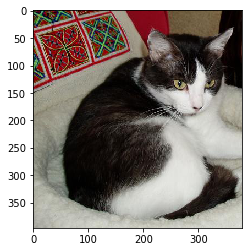

In [13]:
img= plt.imread(trn_fnames[100])
plt.imshow(img)

In [16]:
train_ds= datasets.ImageFolder(trn_dir)
train_ds.classes

['cat', 'dog']

In [17]:
train_ds.class_to_idx

{'cat': 0, 'dog': 1}

In [18]:
train_ds.root

'D:\\Ali\\python files\\catvsdog\\dev\\train'

In [19]:
train_ds.imgs

[('D:\\Ali\\python files\\catvsdog\\dev\\train\\cat\\3997.jpg', 0),
 ('D:\\Ali\\python files\\catvsdog\\dev\\train\\cat\\3998.jpg', 0),
 ('D:\\Ali\\python files\\catvsdog\\dev\\train\\cat\\3999.jpg', 0),
 ('D:\\Ali\\python files\\catvsdog\\dev\\train\\cat\\4000.jpg', 0),
 ('D:\\Ali\\python files\\catvsdog\\dev\\train\\cat\\4001.jpg', 0),
 ('D:\\Ali\\python files\\catvsdog\\dev\\train\\cat\\4002.jpg', 0),
 ('D:\\Ali\\python files\\catvsdog\\dev\\train\\cat\\4003.jpg', 0),
 ('D:\\Ali\\python files\\catvsdog\\dev\\train\\cat\\4004.jpg', 0),
 ('D:\\Ali\\python files\\catvsdog\\dev\\train\\cat\\4005.jpg', 0),
 ('D:\\Ali\\python files\\catvsdog\\dev\\train\\cat\\4006.jpg', 0),
 ('D:\\Ali\\python files\\catvsdog\\dev\\train\\cat\\4007.jpg', 0),
 ('D:\\Ali\\python files\\catvsdog\\dev\\train\\cat\\4008.jpg', 0),
 ('D:\\Ali\\python files\\catvsdog\\dev\\train\\cat\\4009.jpg', 0),
 ('D:\\Ali\\python files\\catvsdog\\dev\\train\\cat\\4010.jpg', 0),
 ('D:\\Ali\\python files\\catvsdog\\dev\\train\\

In [20]:
train_ds.classes

['cat', 'dog']

In [21]:
train_ds.class_to_idx

{'cat': 0, 'dog': 1}

In [22]:
train_ds.root

'D:\\Ali\\python files\\catvsdog\\dev\\train'

In [23]:
train_ds.imgs

[('D:\\Ali\\python files\\catvsdog\\dev\\train\\cat\\3997.jpg', 0),
 ('D:\\Ali\\python files\\catvsdog\\dev\\train\\cat\\3998.jpg', 0),
 ('D:\\Ali\\python files\\catvsdog\\dev\\train\\cat\\3999.jpg', 0),
 ('D:\\Ali\\python files\\catvsdog\\dev\\train\\cat\\4000.jpg', 0),
 ('D:\\Ali\\python files\\catvsdog\\dev\\train\\cat\\4001.jpg', 0),
 ('D:\\Ali\\python files\\catvsdog\\dev\\train\\cat\\4002.jpg', 0),
 ('D:\\Ali\\python files\\catvsdog\\dev\\train\\cat\\4003.jpg', 0),
 ('D:\\Ali\\python files\\catvsdog\\dev\\train\\cat\\4004.jpg', 0),
 ('D:\\Ali\\python files\\catvsdog\\dev\\train\\cat\\4005.jpg', 0),
 ('D:\\Ali\\python files\\catvsdog\\dev\\train\\cat\\4006.jpg', 0),
 ('D:\\Ali\\python files\\catvsdog\\dev\\train\\cat\\4007.jpg', 0),
 ('D:\\Ali\\python files\\catvsdog\\dev\\train\\cat\\4008.jpg', 0),
 ('D:\\Ali\\python files\\catvsdog\\dev\\train\\cat\\4009.jpg', 0),
 ('D:\\Ali\\python files\\catvsdog\\dev\\train\\cat\\4010.jpg', 0),
 ('D:\\Ali\\python files\\catvsdog\\dev\\train\\

In [24]:
type(train_ds.transform)

NoneType

In [25]:
train_ds= datasets.ImageFolder(trn_dir,)

In [26]:
train_ds.classes

['cat', 'dog']

In [27]:
train_ds.class_to_idx

{'cat': 0, 'dog': 1}

In [28]:
type(train_ds.transform)

NoneType

In [29]:
tfms= transforms.Compose([
    transforms.Resize((sz, sz)),
    transforms.ToTensor(),
    transforms.Normalize([.485, .456, .406], [.229, .224, .225])
])

In [30]:
train_ds= datasets.ImageFolder(trn_dir, transform= tfms)
valid_ds= datasets.ImageFolder(val_dir, transform= tfms)

In [31]:
len(train_ds), len(valid_ds)

(2235, 573)

In [32]:
train_dl= torch.utils.data.DataLoader(train_ds, batch_size= batch_size, shuffle= True, num_workers= 8)
valid_dl= torch.utils.data.DataLoader(valid_ds, batch_size= batch_size, shuffle= True, num_workers= 8)

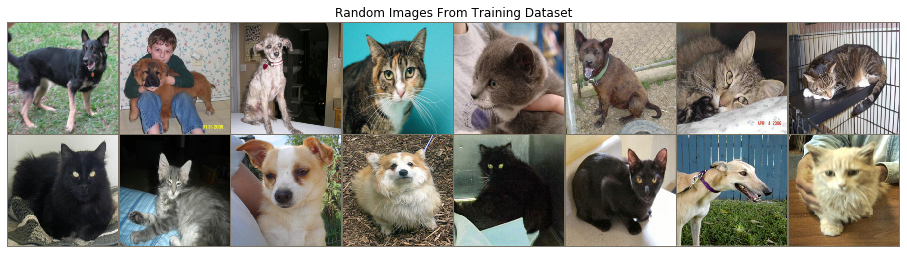

In [33]:
inputs, targets= next(iter(train_dl))
out= torchvision.utils.make_grid(inputs, padding=3)
plt.figure(figsize= (16,12))
imshow(out, title='Random Images From Training Dataset')

In [ ]:
??imshow

In [31]:
class ConvNet(nn.Module):
    def __init__(self):
        super(ConvNet, self).__init__()                     #in init, we introduce the bulding of net and do not do computation

        self.conv1= nn.Sequential(
            nn.Conv2d(3, 16, kernel_size= 5, padding=2),      #to get same image size, padding size= (n-1)/2 ; n= kernel size 
            nn.BatchNorm2d(16), 
            nn.ReLU(),
            nn.MaxPool2d(2)
        )
        self.conv2= nn.Sequential(
            nn.Conv2d(16, 32, kernel_size=5, padding=2),
            nn.BatchNorm2d(32),
            nn.ReLU(),
            nn.MaxPool2d(2)
        )

        self.fc= nn.Linear(56*56*32, 2)                                 #2 is for classification: dog or cat

    def forward(self, x):                                                 # in forward we do computation
        out= self.conv1(x)
        out= self.conv2(out)                                         #(bc:batch_size, C:depth, H:band, W:height)
        out= out.view(out.size(0), -1)                           #(bc, C*H, W),,, view in pytorch do same as reshape in numpy
        out= self.fc(out)
        return(out)
    

In [32]:
model= ConvNet()
model = model.to(device)

In [37]:
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

In [33]:
criterion= nn.CrossEntropyLoss()
optimizer= optim.SGD(model.parameters(), lr= .002, momentum=.9)

In [34]:
num_epochs = 4
losses = []

for epoch in range(num_epochs):
    for i, (inputs, targets) in enumerate(train_dl):
        inputs = inputs.to(device)
        targets = targets.to(device)
        
        # forwad pass
        outputs = model(inputs)
        
        # loss
        loss = criterion(outputs, targets)
        losses.append(loss.item())

        # backward pass
        optimizer.zero_grad()
        loss.backward()
        
        # update parameters
        optimizer.step()
        
        # report
        if (i + 1) % 50 == 0:
            print('Epoch [%2d/%2d], Step [%3d/%3d], Loss: %.4f'
                  % (epoch + 1, num_epochs, i + 1, len(train_ds) // batch_size, loss.item()))

Epoch [ 1/ 4], Step [ 50/139], Loss: 1.3568
Epoch [ 1/ 4], Step [100/139], Loss: 0.6650
Epoch [ 2/ 4], Step [ 50/139], Loss: 0.4330
Epoch [ 2/ 4], Step [100/139], Loss: 0.7104
Epoch [ 3/ 4], Step [ 50/139], Loss: 0.5848
Epoch [ 3/ 4], Step [100/139], Loss: 0.6137
Epoch [ 4/ 4], Step [ 50/139], Loss: 0.6585
Epoch [ 4/ 4], Step [100/139], Loss: 0.7663


Text(0.5, 1.0, 'cross entropy loss')

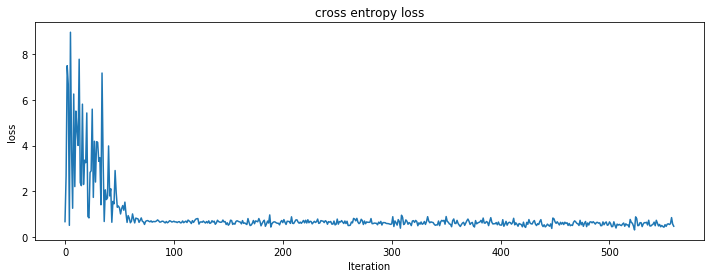

In [36]:
plt.figure(figsize= (12,4))
plt.plot(losses)
plt.xlabel('Iteration')
plt.ylabel('loss')
plt.title('cross entropy loss')


In [34]:
def evaluate_model(model, dataloader, device):
    model.eval()  # for batch normalization layers
    corrects = 0
    
    with torch.no_grad():
        for inputs, targets in dataloader:
            inputs, targets = inputs.to(device), targets.to(device)
            outputs = model(inputs)
            _, preds = torch.max(outputs, 1)
            corrects += (preds == targets.data).sum()
    
    print('accuracy: {:.2f}'.format(100. * corrects / len(dataloader.dataset)))

In [40]:
evaluate_model(model, valid_dl, device)

accuracy: 61.00


In [41]:
evaluate_model(model, train_dl, device)

accuracy: 79.00


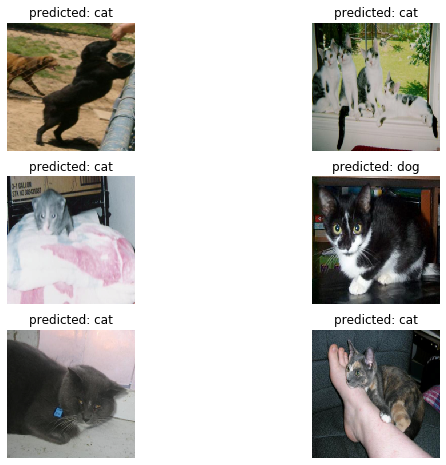

In [42]:
visualize_model(model, train_dl, device)

100%|██████████████████████████████████████████████████████████████████████████████████| 36/36 [01:02<00:00,  1.73s/it]


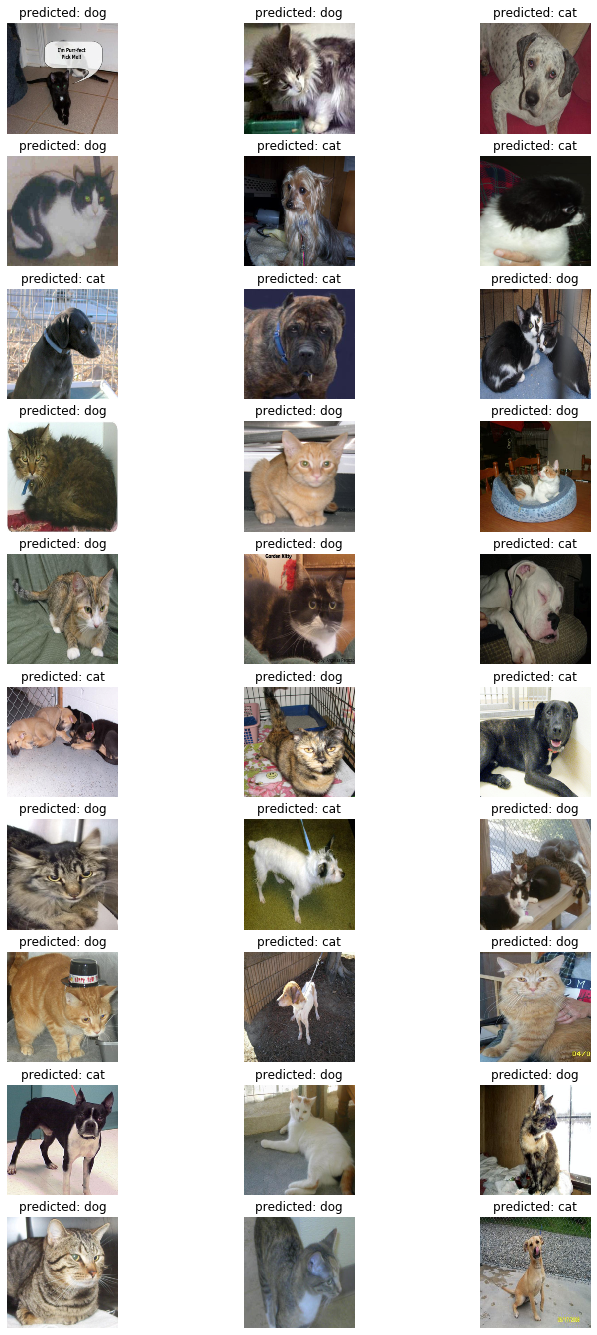

62 images out of 573 were misclassified.


In [43]:
plot_errors(model, valid_dl, device)

100%|██████████████████████████████████████████████████████████████████████████████████| 36/36 [00:58<00:00,  1.62s/it]


[[0.61 0.39]
 [0.38 0.62]]


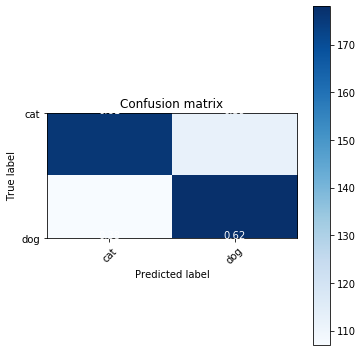

In [48]:
y_pred, y_true= predict_class(model, valid_dl, device)
cm= confusion_matrix(y_true, y_pred)
plot_confusion_matrix(cm, train_ds.classes, normalize= True, figsize=(5,5))


In [40]:
#Transfer learning
model= load_pretrained_resnet50(model_path= None, num_classes= 2)

#loss and optimizer
criterion= nn.CrossEntropyLoss()
optimizer= optim.SGD(model.parameters(), lr= .002, momentum= .9)
scheduler= optim.lr_scheduler.StepLR(optimizer, step_size= 2, gamma=.9)



In [ ]:
model= train_model(model, train_dl, valid_dl, criterion, optimizer, device, scheduler)

Epoch 1/10
----------
  Step 0/139 | Loss: 0.69990

In [ ]:
??load_pretrained_resnet50